## Iris 데이터셋 k-NN 알고리즘으로 분류하기

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

C:\Users\user\AppData\Local\Temp\ipykernel_25824\1813245643.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 데이터셋 불러오기

In [2]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris.data, iris.target],
                  columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# train, test 데이터셋 분리
X = df[df.columns[:-1]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### 데이터 전처리

In [3]:
# 정규화 작업
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# test 데이터에도 같은 정규화 적용
X_test = scaler.transform(X_test)

pd.DataFrame(X_train, columns = df.columns[:-1]).head()

,sepal length,sepal width,petal length,petal width
0,0.857143,0.333333,0.864407,0.750000
1,0.457143,0.083333,0.677966,0.583333
2,0.085714,0.500000,0.101695,0.041667
3,0.200000,0.625000,0.067797,0.041667
4,0.457143,0.083333,0.508475,0.375000


#### 모델 적용

In [4]:
# kNN 모델 선언 (k=3으로 설정)
k = 3
model = KNeighborsClassifier(n_neighbors = k)

# 모델 학습
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
# 실제 라벨 예측해보기
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

#### 최적의 k값 찾기

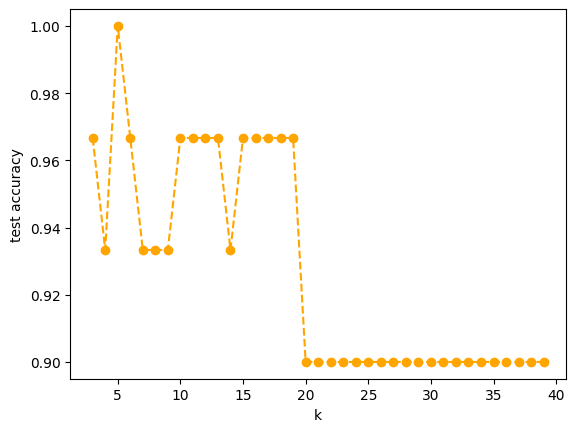

In [6]:
k_range = range(3,40)

# k에따른 accuracy 저장
accuracy_list = []

# 각 k마다 모델 테스트
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    
# 시각화
plt.plot(k_range, accuracy_list, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()